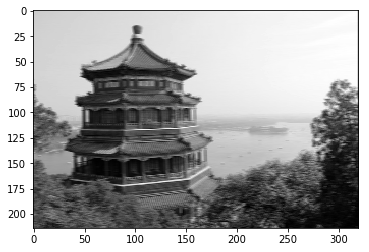

In [0]:
''''Understanding filters and 
How to build a convolution layer'''

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

from sklearn.datasets import load_sample_images

# load sample images
data = np.array(load_sample_images().images, dtype=np.float32)
batch_size, height, width, channels = data.shape

# make filters
filter_test = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)

filter_test[:, 3, :, 0] = 1 # vertical filter
filter_test[3, :, :, 1] = 1 # horizontal filter

X = tf.placeholder(tf.float32, shape=(None, height, width, channels))

convolution = tf.nn.conv2d(X, filter_test, 
                           strides=[1, 2, 2, 1], padding='SAME')

with tf.Session() as sess:
    output = sess.run(convolution, feed_dict={X : data})

plt.imshow(output[0, :, :, 1], cmap='gray')
plt.show()